<a href="https://colab.research.google.com/github/Yoshani/Pump-It-Up/blob/master/Pump_It_Up_Outlier_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

# Get datasets

In [ ]:
features_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TrainingSet.csv", 
    index_col="id",
    low_memory=False
)
labels_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TrainingLabels.csv", 
    index_col="id"
)
test_df = pd.read_csv(
    "/content/drive/MyDrive/PumpItUp/TestSet.csv", 
    index_col="id",
    low_memory=False
)

In [ ]:
X = features_df.copy()
y = labels_df.copy()
X_test = test_df.copy()

# Outlier Analysis

Text(0.5, 1.0, 'Overall Boxplot')

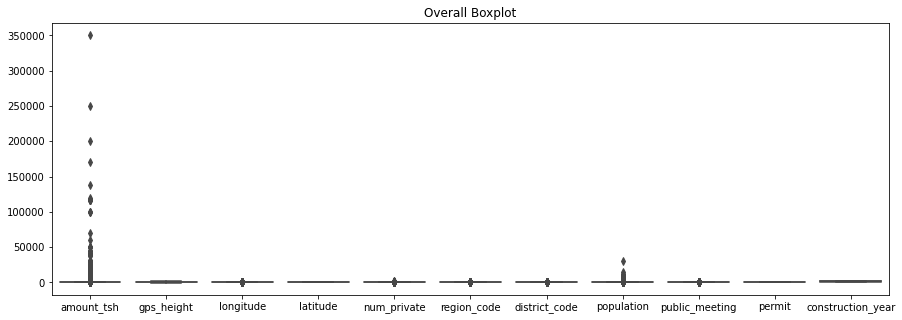

In [ ]:
plt.subplots(figsize=(15, 5))
sns.boxplot(data=features_df)
plt.title("Overall Boxplot")

Viewing altogether does not reveal much due to differences in scale

In [ ]:
# numeric columns
cols = ['gps_height','longitude','latitude','region_code', 'district_code','construction_year']

Text(0.5, 1.0, 'Boxplot of Longitude')

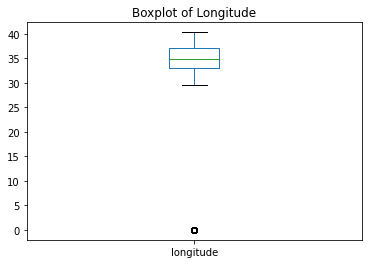

In [ ]:
features_df['longitude'].plot.box()
plt.title("Boxplot of Longitude")

Zero in longitude seems to be an outlier

Text(0.5, 1.0, 'Boxplot of GPS height')

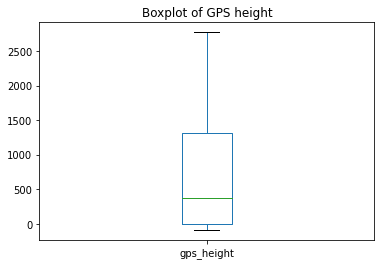

In [ ]:
features_df['gps_height'].plot.box()
plt.title("Boxplot of GPS height")

Text(0.5, 1.0, 'Boxplot of Latitude')

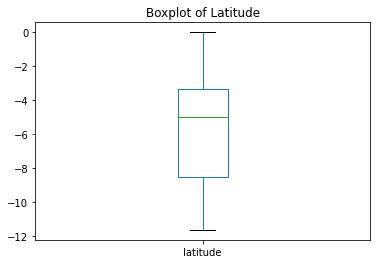

In [ ]:
features_df['latitude'].plot.box()
plt.title("Boxplot of Latitude")

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000.]), <a list of 9 Text major ticklabel objects>)

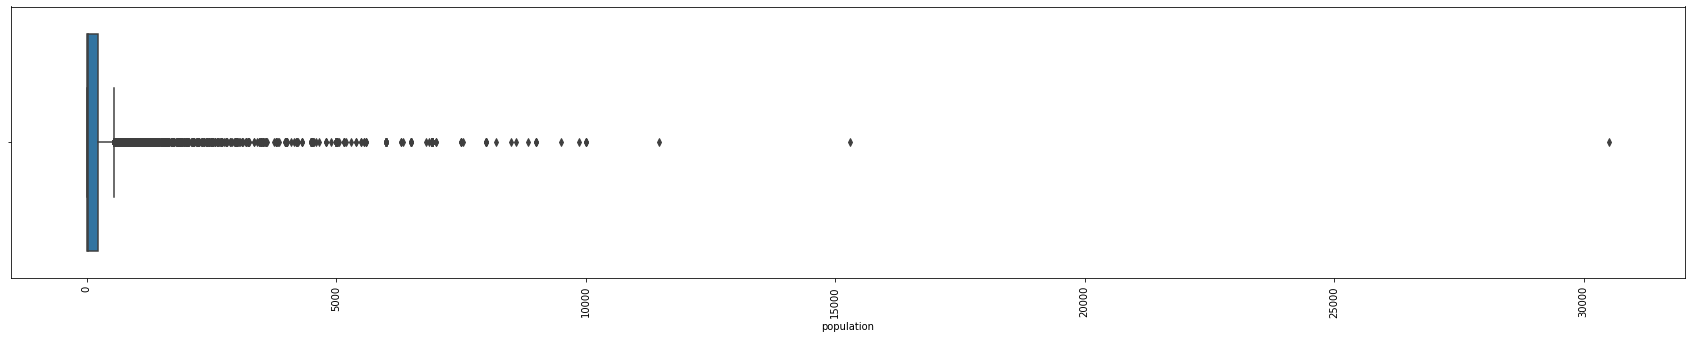

In [ ]:
plt.subplots(figsize=(30, 5))
sns.boxplot(x='population',data=features_df)
plt.xticks(rotation=90)

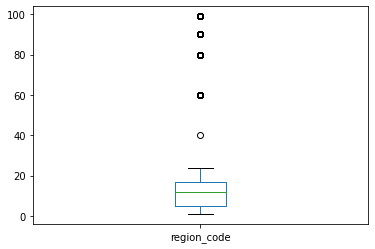

In [ ]:
features_df['region_code'].plot.box()

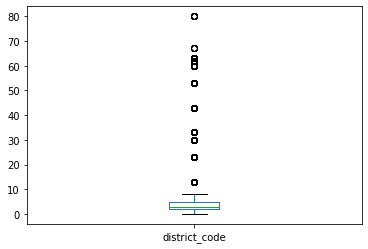

In [ ]:
features_df['district_code'].plot.box()

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000., 2250.]), <a list of 11 Text major ticklabel objects>)

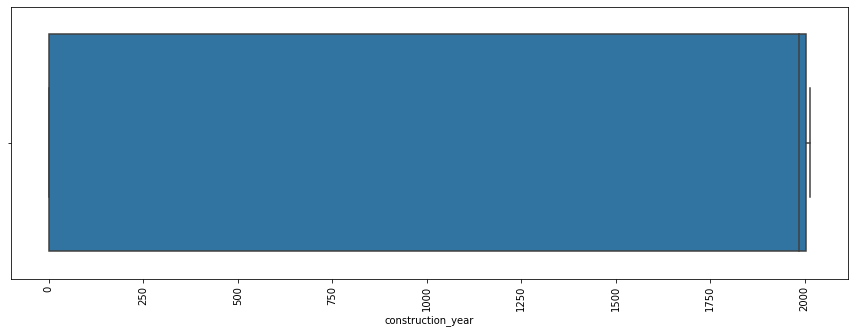

In [ ]:
plt.subplots(figsize=(15, 5))
sns.boxplot(x='construction_year',data=features_df)
plt.xticks(rotation=90)

In [ ]:
combined_df = features_df.copy()
combined_df['status_group'] = labels_df['status_group']

In [ ]:
# label encode y for visualizing
label_map = {
    "functional": 0,
    "functional needs repair": 1,
    "non functional": 2
  }

combined_df['status_group'] = combined_df['status_group'].map(label_map)

0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

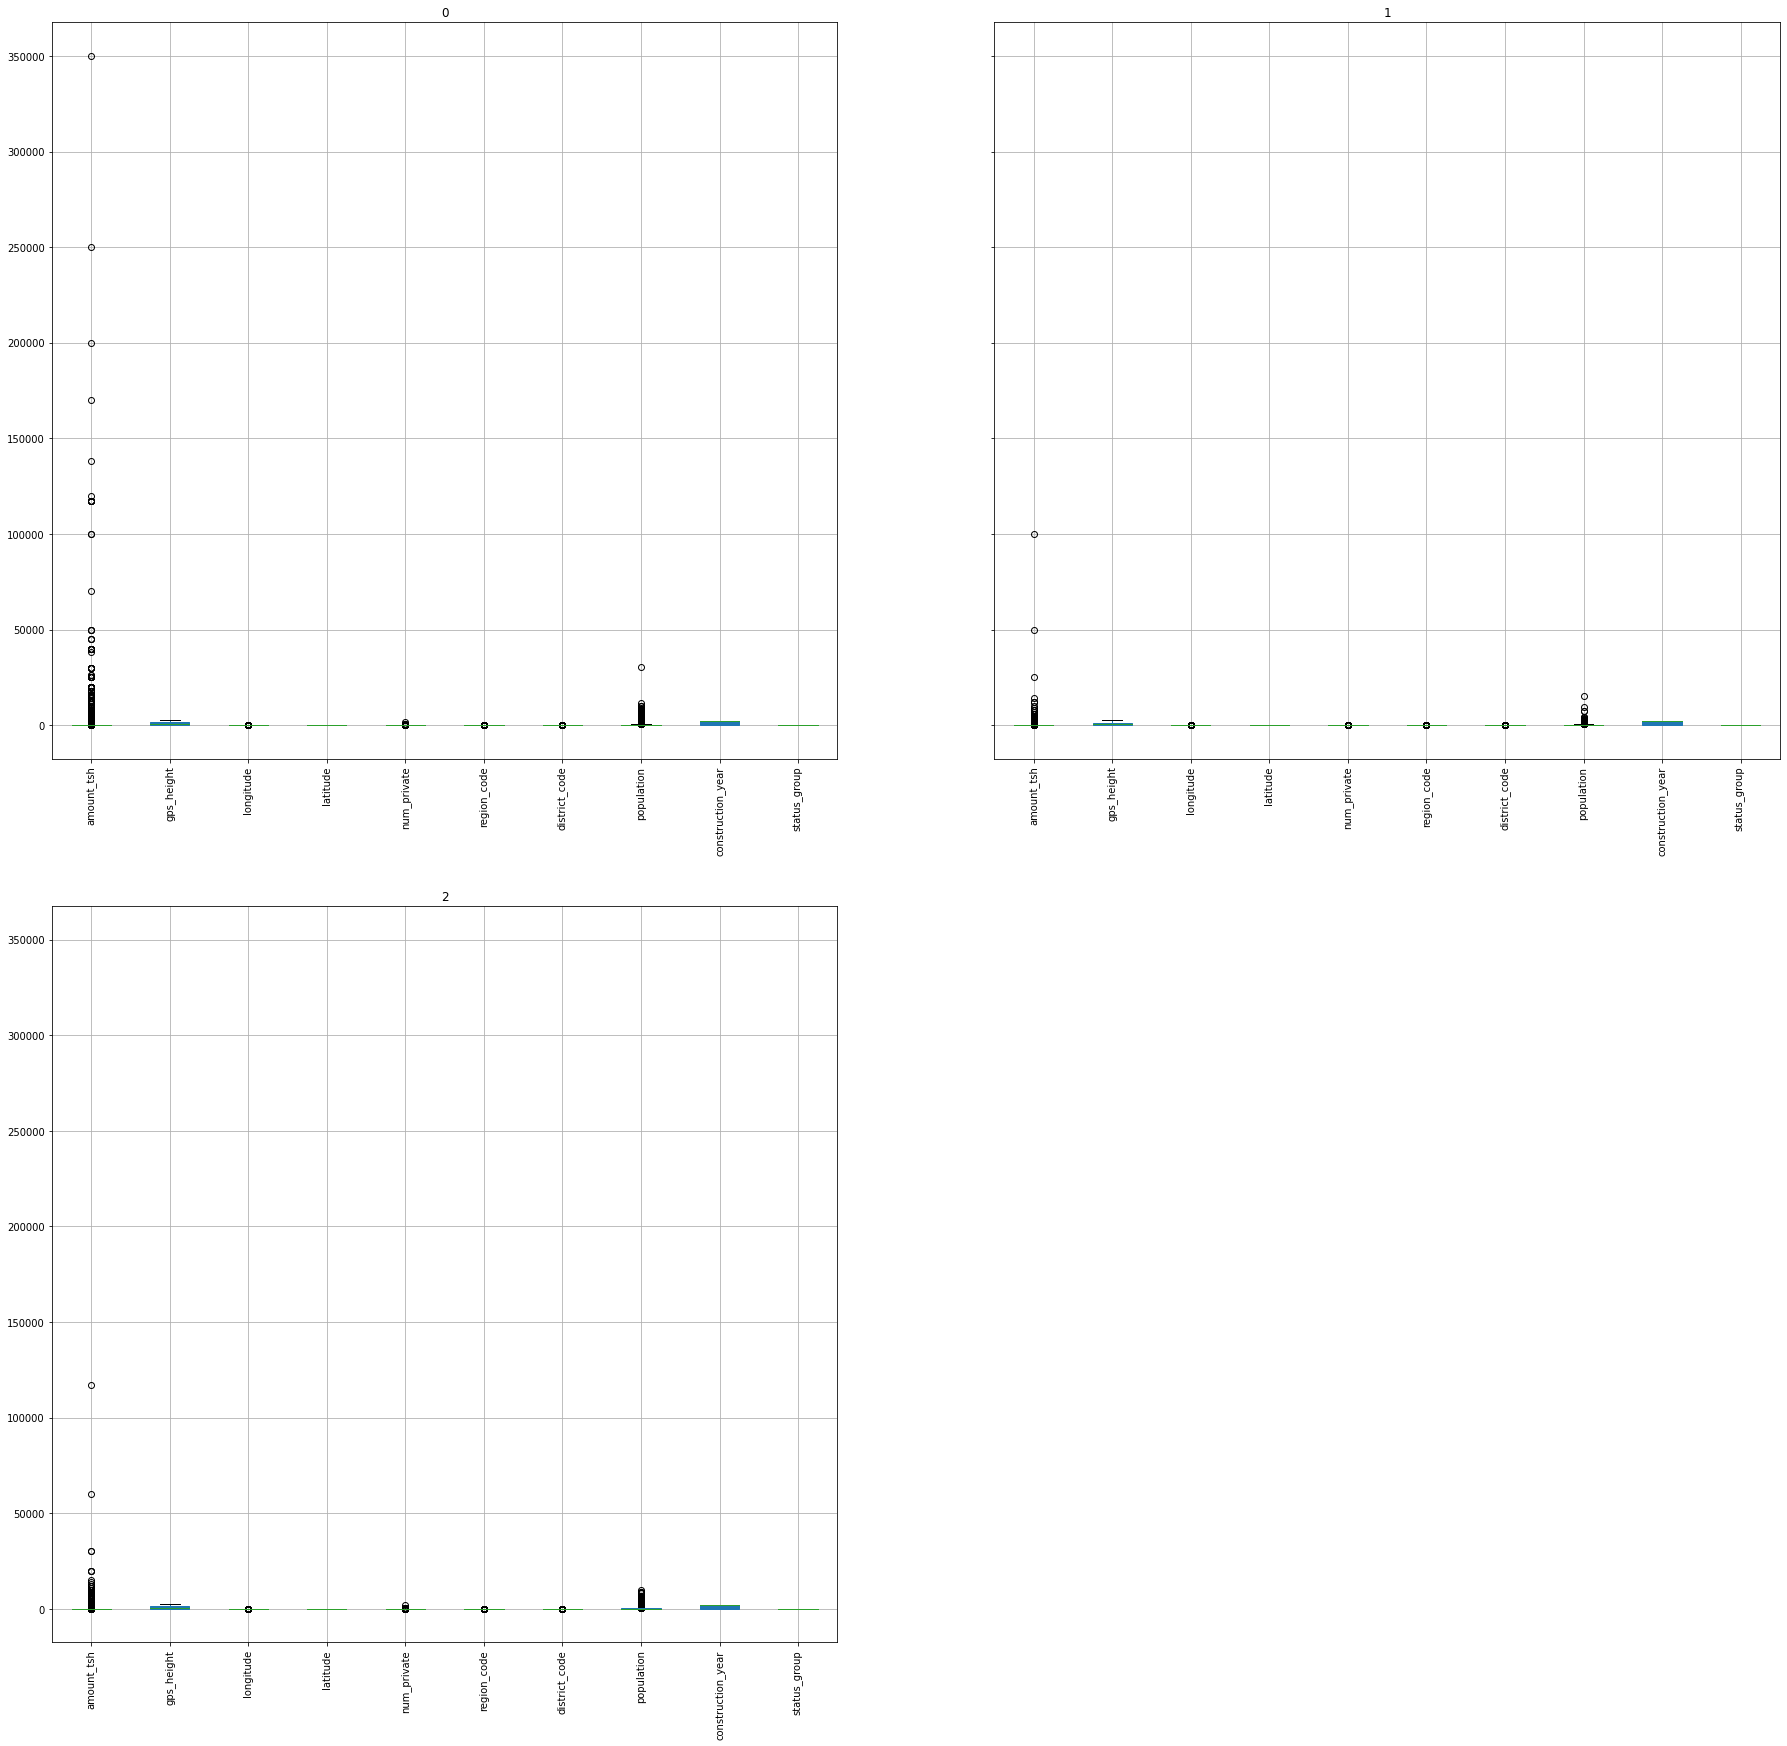

In [ ]:
combined_df.groupby('status_group').boxplot(fontsize=10,rot=90,figsize=(30,30),patch_artist=True)